In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1=pd.read_csv(r'E:\Downloads\Compressed\yg821jf8611_ri_statewide_2020_04_01.csv\ri_statewide_2020_04_01.csv')
data1

C:\Users\ahmed\anaconda3\anaconda4\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,17,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509676,509677,2015-08-04,10:40:00,X3,white,male,500,vehicular,False,True,...,Equipment/Inspection Violation,JEEP,GRAND CHEROKEE,EQ,W,M,M,NaN,NaN,NaN
509677,509678,2015-12-20,11:17:00,K3,white,female,300,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
509678,509679,2015-11-09,23:35:00,X4,white,male,300,vehicular,False,False,...,Equipment/Inspection Violation,FORD,TAURUS,EQ,W,M,W,NaN,NaN,NaN
509679,509680,2015-10-30,11:09:00,X4,white,female,500,vehicular,False,True,...,Speeding,VOLK,BUG,SP,W,F,M,NaN,NaN,NaN


In [3]:
# preparing data for analysis
#1- check the null values
#2- check unneeded columns
#3-replace null values with another values

In [5]:
data1.isnull().sum()

raw_row_number                0
date                         10
time                         10
zone                         10
subject_race              29073
subject_sex               29097
department_id                10
type                          0
arrest_made               29073
citation_issued           29073
warning_issued            29073
outcome                   35841
contraband_found         491919
contraband_drugs         493693
contraband_weapons       497886
contraband_alcohol       508464
contraband_other         491919
frisk_performed              10
search_conducted              0
search_basis             491919
reason_for_search        491919
reason_for_stop           29073
vehicle_make             191564
vehicle_model            279593
raw_BasisForStop          29073
raw_OperatorRace          29073
raw_OperatorSex           29073
raw_ResultOfStop          29073
raw_SearchResultOne      491919
raw_SearchResultTwo      508862
raw_SearchResultThree    509513
dtype: i

In [6]:
data=data1.drop(['raw_SearchResultOne','raw_SearchResultThree','raw_SearchResultTwo','reason_for_search','search_basis','contraband_other','contraband_alcohol','contraband_weapons','contraband_drugs','contraband_found'],axis=1)

In [7]:
data

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,outcome,frisk_performed,search_conducted,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,citation,False,False,Speeding,NaN,NaN,SP,W,M,M
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,citation,False,False,Speeding,NaN,NaN,SP,W,M,M
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,citation,False,False,Speeding,NaN,NaN,SP,W,F,M
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,...,citation,False,False,Speeding,NaN,NaN,SP,W,M,M
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,...,citation,False,False,Speeding,NaN,NaN,SP,W,F,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509676,509677,2015-08-04,10:40:00,X3,white,male,500,vehicular,False,True,...,citation,False,False,Equipment/Inspection Violation,JEEP,GRAND CHEROKEE,EQ,W,M,M
509677,509678,2015-12-20,11:17:00,K3,white,female,300,vehicular,False,True,...,citation,False,False,Speeding,NaN,NaN,SP,W,F,M
509678,509679,2015-11-09,23:35:00,X4,white,male,300,vehicular,False,False,...,warning,False,False,Equipment/Inspection Violation,FORD,TAURUS,EQ,W,M,W
509679,509680,2015-10-30,11:09:00,X4,white,female,500,vehicular,False,True,...,citation,False,False,Speeding,VOLK,BUG,SP,W,F,M


In [8]:
data.isnull().sum()

raw_row_number           0
date                    10
time                    10
zone                    10
subject_race         29073
subject_sex          29097
department_id           10
type                     0
arrest_made          29073
citation_issued      29073
warning_issued       29073
outcome              35841
frisk_performed         10
search_conducted         0
reason_for_stop      29073
vehicle_make        191564
vehicle_model       279593
raw_BasisForStop     29073
raw_OperatorRace     29073
raw_OperatorSex      29073
raw_ResultOfStop     29073
dtype: int64

In [9]:
data.drop(['raw_BasisForStop','raw_OperatorSex','raw_OperatorRace'],axis=1,inplace=True)

In [10]:
data.fillna('there is no',inplace=True)
data

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,warning_issued,outcome,frisk_performed,search_conducted,reason_for_stop,vehicle_make,vehicle_model,raw_ResultOfStop
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509676,509677,2015-08-04,10:40:00,X3,white,male,500,vehicular,False,True,False,citation,False,False,Equipment/Inspection Violation,JEEP,GRAND CHEROKEE,M
509677,509678,2015-12-20,11:17:00,K3,white,female,300,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
509678,509679,2015-11-09,23:35:00,X4,white,male,300,vehicular,False,False,True,warning,False,False,Equipment/Inspection Violation,FORD,TAURUS,W
509679,509680,2015-10-30,11:09:00,X4,white,female,500,vehicular,False,True,False,citation,False,False,Speeding,VOLK,BUG,M


In [11]:
data.isnull().sum()

raw_row_number      0
date                0
time                0
zone                0
subject_race        0
subject_sex         0
department_id       0
type                0
arrest_made         0
citation_issued     0
warning_issued      0
outcome             0
frisk_performed     0
search_conducted    0
reason_for_stop     0
vehicle_make        0
vehicle_model       0
raw_ResultOfStop    0
dtype: int64

In [12]:
data.dtypes

raw_row_number       int64
date                object
time                object
zone                object
subject_race        object
subject_sex         object
department_id       object
type                object
arrest_made         object
citation_issued     object
warning_issued      object
outcome             object
frisk_performed     object
search_conducted      bool
reason_for_stop     object
vehicle_make        object
vehicle_model       object
raw_ResultOfStop    object
dtype: object

In [13]:
data=data[(data.date != 'there is no')&(data.time != 'there is no')]

In [13]:
data

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,warning_issued,outcome,frisk_performed,search_conducted,reason_for_stop,vehicle_make,vehicle_model,raw_ResultOfStop
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509675,509676,2015-08-16,13:37:00,X1,white,female,0,vehicular,False,False,False,there is no,False,False,Equipment/Inspection Violation,NISS,MAXIMA,N
509676,509677,2015-08-04,10:40:00,X3,white,male,500,vehicular,False,True,False,citation,False,False,Equipment/Inspection Violation,JEEP,GRAND CHEROKEE,M
509677,509678,2015-12-20,11:17:00,K3,white,female,300,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
509678,509679,2015-11-09,23:35:00,X4,white,male,300,vehicular,False,False,True,warning,False,False,Equipment/Inspection Violation,FORD,TAURUS,W


In [14]:
#create datetime index
combined=data.date.str.cat(data.time, sep=' ')
combined.head()

0    2005-11-22 11:15:00
1    2005-10-01 12:20:00
2    2005-10-01 12:30:00
3    2005-10-01 12:50:00
4    2005-10-01 13:10:00
Name: date, dtype: object

In [15]:
data['date_and_time']=pd.to_datetime(combined)
data.head()

<ipython-input-15-c949d4f87cf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_and_time']=pd.to_datetime(combined)


,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,warning_issued,outcome,frisk_performed,search_conducted,reason_for_stop,vehicle_make,vehicle_model,raw_ResultOfStop,date_and_time
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M,2005-11-22 11:15:00
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M,2005-10-01 12:20:00
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M,2005-10-01 12:30:00
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M,2005-10-01 12:50:00
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M,2005-10-01 13:10:00


In [16]:
data.set_index('date_and_time',inplace=True)
data.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,warning_issued,outcome,frisk_performed,search_conducted,reason_for_stop,vehicle_make,vehicle_model,raw_ResultOfStop
date_and_time,,,,,,,,,,,,,,,,,,
2005-11-22 11:15:00,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
2005-10-01 12:20:00,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
2005-10-01 12:30:00,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
2005-10-01 12:50:00,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
2005-10-01 13:10:00,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M


In [17]:
data.drop(['date','time'],axis=1,inplace=True)

C:\Users\ahmed\anaconda3\anaconda4\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
# which genderr makes more violations
data.subject_sex.value_counts(normalize=True)

male           0.685631
female         0.257299
there is no    0.057070
Name: subject_sex, dtype: float64

In [20]:
#which race do more violations
data.subject_race.value_counts(normalize=True)

white                     0.676385
black                     0.134555
hispanic                  0.104234
there is no               0.057023
asian/pacific islander    0.025165
other                     0.002637
Name: subject_race, dtype: float64

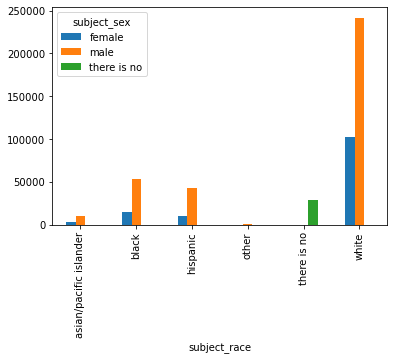

In [102]:
table=pd.crosstab(data.subject_race,data.subject_sex)
table.plot(kind='bar')
plt.show()

In [21]:
#comparing stop outcomes for different genders

In [22]:
male=data[data.subject_sex=='male']
male.shape
female=data[data.subject_sex=='female']

In [25]:
male.outcome.value_counts(normalize=True)

citation       0.889130
warning        0.059025
arrest         0.037946
there is no    0.013899
Name: outcome, dtype: float64

In [27]:
female.outcome.value_counts(normalize=True)

citation       0.897337
warning        0.062636
arrest         0.025492
there is no    0.014534
Name: outcome, dtype: float64

In [28]:
#does gender affect who is arrested
female_and_arrested=data[(data.subject_sex=='female') &(data.arrest_made==True)]
female_and_arrested.shape

(3343, 16)

In [29]:
male_and_arrested=data[(data.subject_sex=='male') &(data.arrest_made==True)]
male_and_arrested.shape
# males get arrested more than females

(13260, 16)

In [30]:
data['arrest_made']=data['arrest_made'].astype(bool)
data['arrest_made'].dtype

<ipython-input-30-7e72428abb1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['arrest_made']=data['arrest_made'].astype(bool)


dtype('bool')

In [31]:
#does gender affect who is searched
male.search_conducted.value_counts(normalize=True)

False    0.956208
True     0.043792
Name: search_conducted, dtype: float64

In [32]:
female.search_conducted.value_counts(normalize=True)

False    0.981249
True     0.018751
Name: search_conducted, dtype: float64

In [33]:
data.groupby('subject_sex').search_conducted.value_counts(normalize=True)

subject_sex  search_conducted
female       False               0.981249
             True                0.018751
male         False               0.956208
             True                0.043792
there is no  False               1.000000
Name: search_conducted, dtype: float64

In [34]:
#which zone made more violations
data.zone.unique()

array(['X3', 'X4', 'K3', 'K2', 'K1', 'X1'], dtype=object)

In [35]:
data['zone']=data.zone.astype('category')
data.zone.dtype

<ipython-input-35-9d46bf74a58e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['zone']=data.zone.astype('category')


CategoricalDtype(categories=['K1', 'K2', 'K3', 'X1', 'X3', 'X4'], ordered=False)

In [36]:
data['outcome']=data['outcome'].astype('category')
data.outcome.dtype

<ipython-input-36-6b24a8a2b267>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['outcome']=data['outcome'].astype('category')


CategoricalDtype(categories=['arrest', 'citation', 'there is no', 'warning'], ordered=False)

In [35]:
data.zone.value_counts(normalize=True)
#X4 have the highest violation rate

X4    0.265562
K3    0.223250
K2    0.198958
X3    0.184547
K1    0.094889
X1    0.032796
Name: zone, dtype: float64

In [37]:
# which violation is the common in all zones
data.reason_for_stop.value_counts()

Speeding                            268744
Other Traffic Violation              90234
Equipment/Inspection Violation       61252
there is no                          29063
Registration Violation               19830
Seatbelt Violation                   16327
Special Detail/Directed Patrol       13642
Call for Service                      7609
Violation of City/Town Ordinance      1036
Motorist Assist/Courtesy               990
APB                                    485
Suspicious Person                      342
Warrant                                117
Name: reason_for_stop, dtype: int64

In [38]:
#which violation is more common in each zone
data.groupby('zone').reason_for_stop.value_counts(normalize=True)

zone  reason_for_stop                 
K1    Speeding                            0.683760
      Other Traffic Violation             0.147430
      Equipment/Inspection Violation      0.078326
      there is no                         0.046421
      Special Detail/Directed Patrol      0.020863
                                            ...   
X4    Violation of City/Town Ordinance    0.002187
      Motorist Assist/Courtesy            0.001323
      APB                                 0.001020
      Suspicious Person                   0.000717
      Warrant                             0.000266
Name: reason_for_stop, Length: 78, dtype: float64

In [47]:
#does race affect who is frisked during a search

In [48]:
data.groupby('subject_race').frisk_performed.value_counts(normalize=True)

subject_race            frisk_performed
asian/pacific islander  False              0.989552
                        True               0.010448
black                   False              0.966360
                        True               0.033640
hispanic                False              0.970409
                        True               0.029591
other                   False              0.994792
                        True               0.005208
there is no             False              1.000000
white                   False              0.984620
                        True               0.015380
Name: frisk_performed, dtype: float64

In [41]:
data.dtypes

raw_row_number         int64
zone                category
subject_race          object
subject_sex           object
department_id         object
type                  object
arrest_made             bool
citation_issued       object
warning_issued        object
outcome             category
frisk_performed       object
search_conducted        bool
reason_for_stop       object
vehicle_make          object
vehicle_model         object
raw_ResultOfStop      object
dtype: object

In [62]:
#does time of the day affect the
time_of_day=data.groupby(data.index.hour).raw_row_number.mean()
time_of_day

date_and_time
0     249702.913042
1     247618.729763
2     251456.717988
3     250776.272265
4     228908.874920
5     234333.585443
6     270393.509807
7     253244.443248
8     245231.919252
9     254217.475043
10    262306.512867
11    256140.241312
12    245690.130596
13    264090.234961
14    261290.240905
15    260308.875659
16    257758.975654
17    257854.541131
18    248519.852825
19    262660.408595
20    244155.843256
21    237334.674583
22    262416.539356
23    248730.079739
Name: raw_row_number, dtype: float64

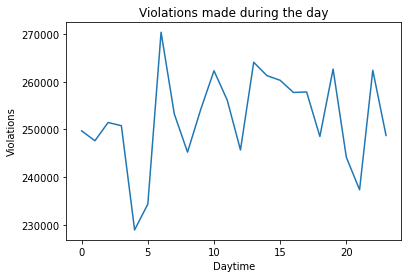

In [91]:
time_of_day.plot()
plt.xlabel('Daytime')
plt.ylabel('Violations')
plt.title('Violations made during the day')
plt.show()

In [92]:
data.reason_for_stop.value_counts()

Speeding                            268744
Other Traffic Violation              90234
Equipment/Inspection Violation       61252
there is no                          29063
Registration Violation               19830
Seatbelt Violation                   16327
Special Detail/Directed Patrol       13642
Call for Service                      7609
Violation of City/Town Ordinance      1036
Motorist Assist/Courtesy               990
APB                                    485
Suspicious Person                      342
Warrant                                117
Name: reason_for_stop, dtype: int64

In [97]:
data

,raw_row_number,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,warning_issued,outcome,frisk_performed,search_conducted,reason_for_stop,vehicle_make,vehicle_model,raw_ResultOfStop
date_and_time,,,,,,,,,,,,,,,,
2005-11-22 11:15:00,1,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
2005-10-01 12:20:00,2,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
2005-10-01 12:30:00,3,X3,white,female,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
2005-10-01 12:50:00,4,X3,white,male,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
2005-10-01 13:10:00,5,X3,white,female,200,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-16 13:37:00,509676,X1,white,female,0,vehicular,False,False,False,there is no,False,False,Equipment/Inspection Violation,NISS,MAXIMA,N
2015-08-04 10:40:00,509677,X3,white,male,500,vehicular,False,True,False,citation,False,False,Equipment/Inspection Violation,JEEP,GRAND CHEROKEE,M
2015-12-20 11:17:00,509678,K3,white,female,300,vehicular,False,True,False,citation,False,False,Speeding,there is no,there is no,M
